In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df1=pd.read_csv("loan.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [70]:
df1.shape

(614, 13)

In [74]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [80]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
df1.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

### 2.Target variable analysis(loan_status)

Loan status distribution
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64


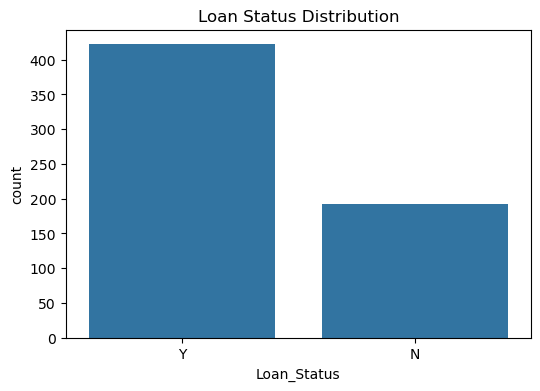

In [93]:
print("Loan status distribution")
loan_status_dist=df1["Loan_Status"].value_counts(normalize=True)*100
print(loan_status_dist)
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status',data=df1)
plt.title('Loan Status Distribution')
plt.show()

### 3.Categorical Variables Analysis:

Categorical Variables Analysis

Gender Distribution:
Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


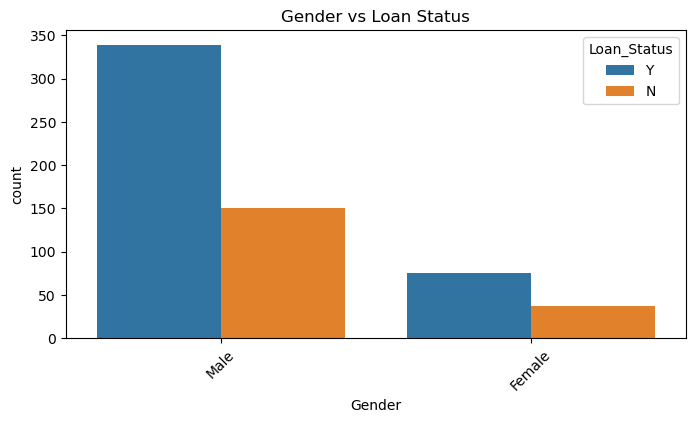


Married Distribution:
Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


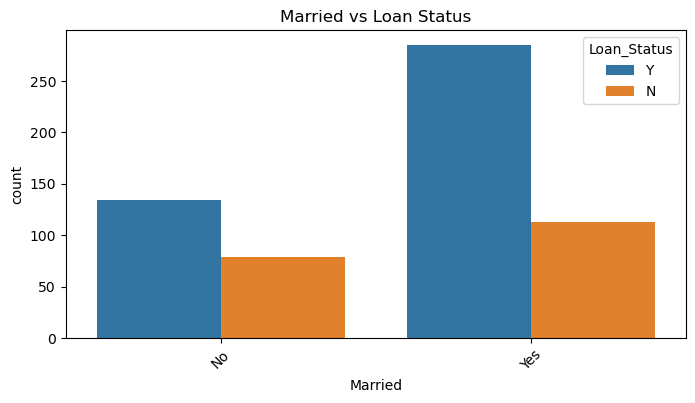


Dependents Distribution:
Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


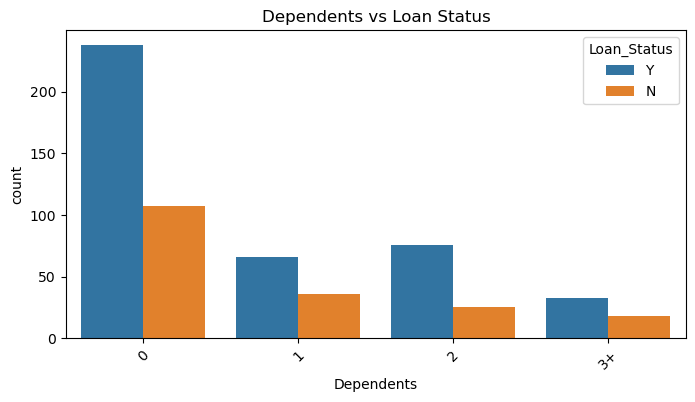


Education Distribution:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


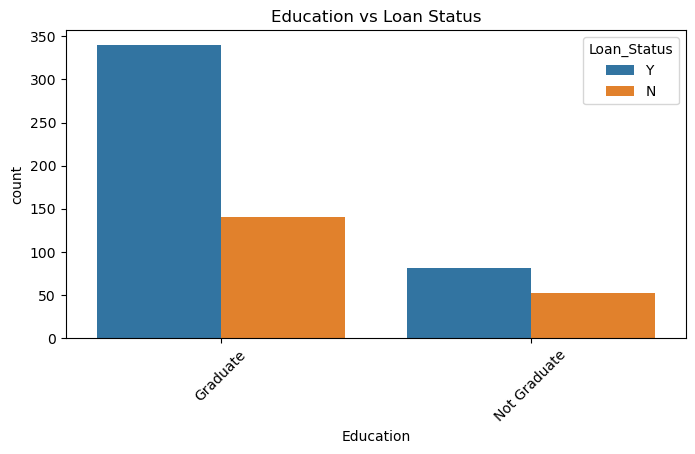


Self_Employed Distribution:
Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


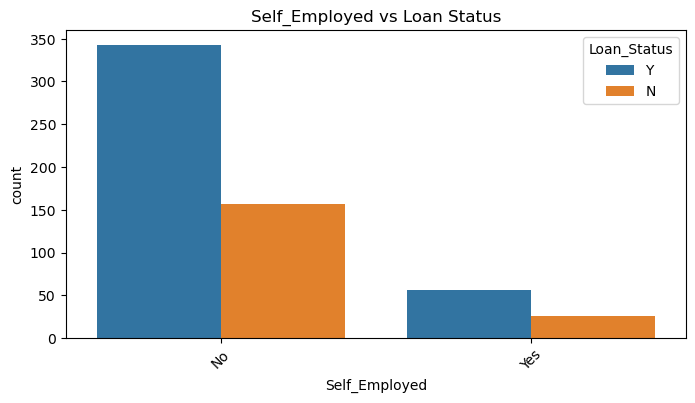


Credit_History Distribution:
Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


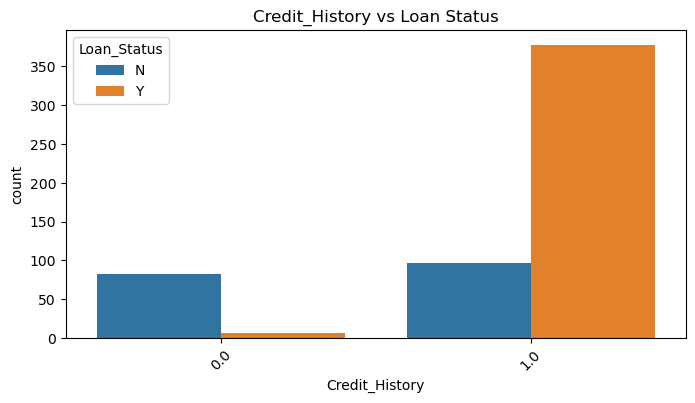


Property_Area Distribution:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


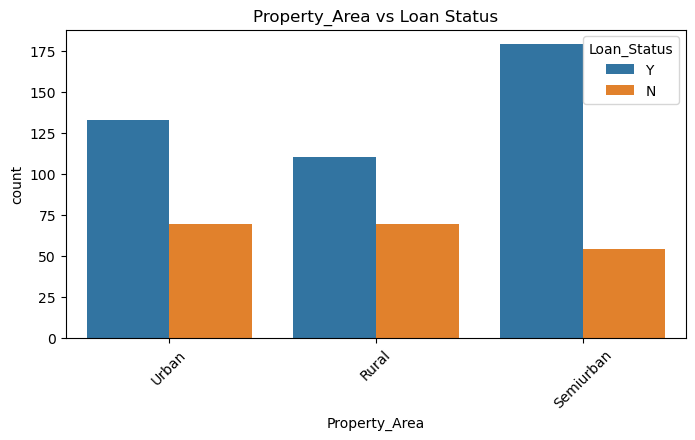

In [96]:
categorical_cols=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
print("Categorical Variables Analysis")
for col in categorical_cols:
    print(f'\n{col} Distribution:')
    print(df1[col].value_counts(dropna=False))
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df1,hue='Loan_Status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=45)
    plt.show()

### Numerical Variable Analysis:

Numerical Variable Analysis
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       614.000000         614.000000  592.000000         600.00000
mean       5403.459283        1621.245798  146.412162         342.00000
std        6109.041673        2926.248369   85.587325          65.12041
min         150.000000           0.000000    9.000000          12.00000
25%        2877.500000           0.000000  100.000000         360.00000
50%        3812.500000        1188.500000  128.000000         360.00000
75%        5795.000000        2297.250000  168.000000         360.00000
max       81000.000000       41667.000000  700.000000         480.00000


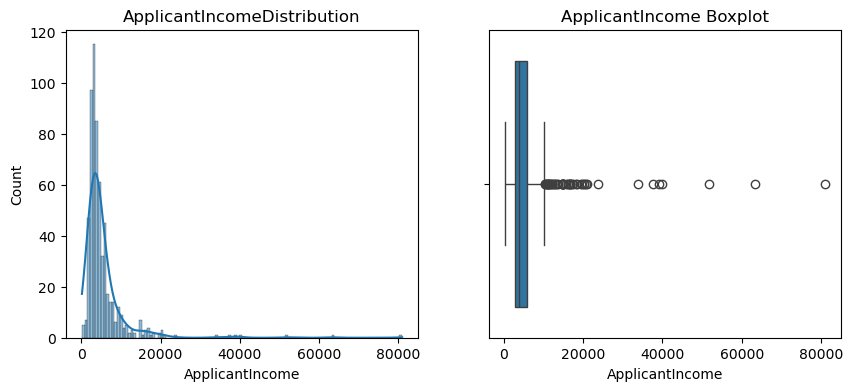

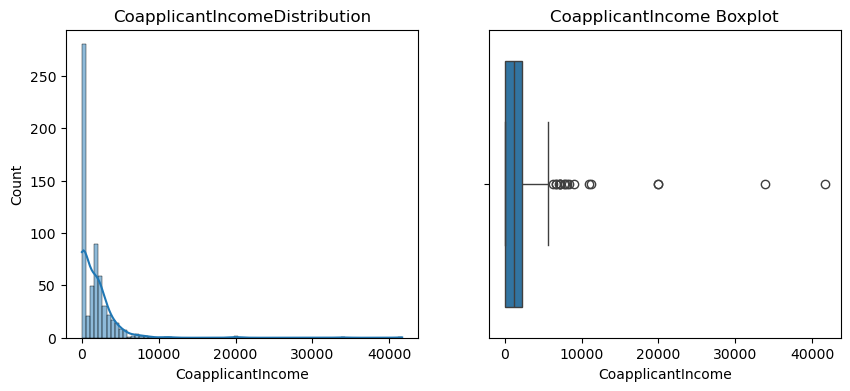

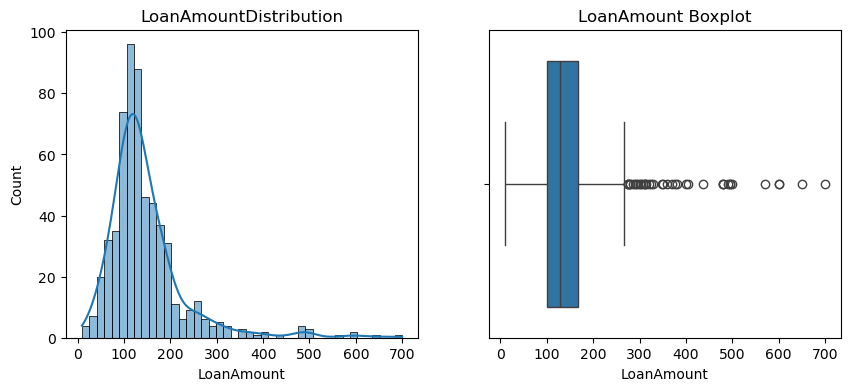

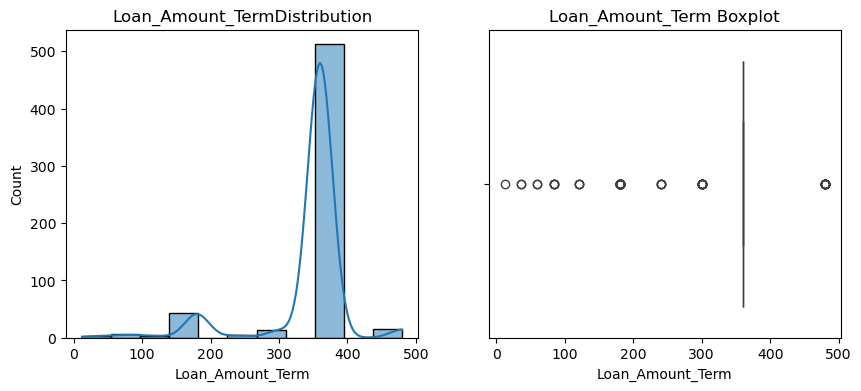

In [109]:
numerical_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
print('Numerical Variable Analysis')
print(df1[numerical_cols].describe())
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df1[col],kde=True)
    plt.title(f'{col}Distribution')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df1[col])
    plt.title(f'{col} Boxplot')
    plt.show()

### 5.Correlation Analysis:

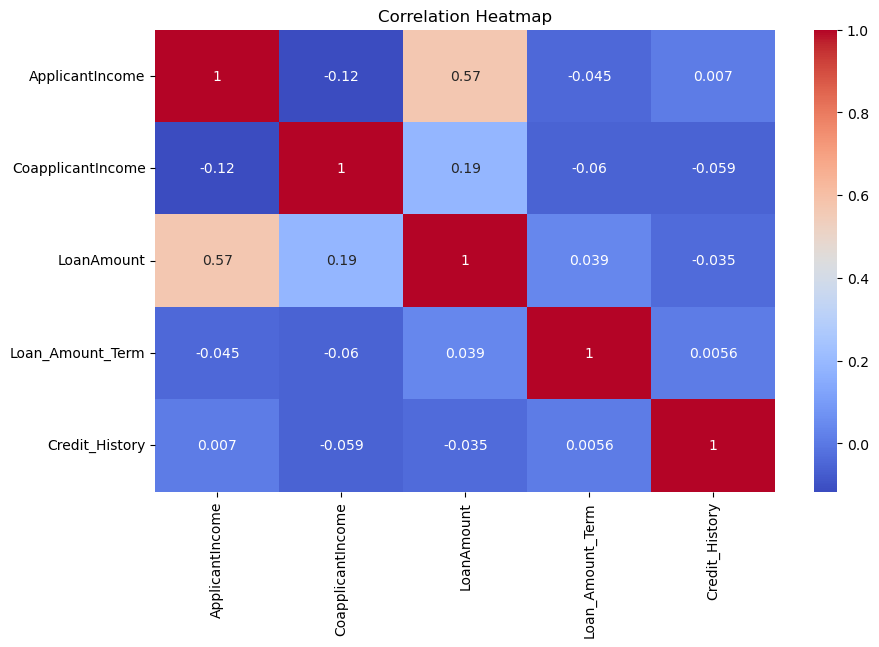

In [116]:
### --->Creating a copy to handle missing values temporarily
df_temp=df1.copy()
df_temp['Credit_History']=df_temp['Credit_History'].fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(df_temp[numerical_cols+['Credit_History']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Bivariate Analysis:

### Loan status vs Numerical Variables:

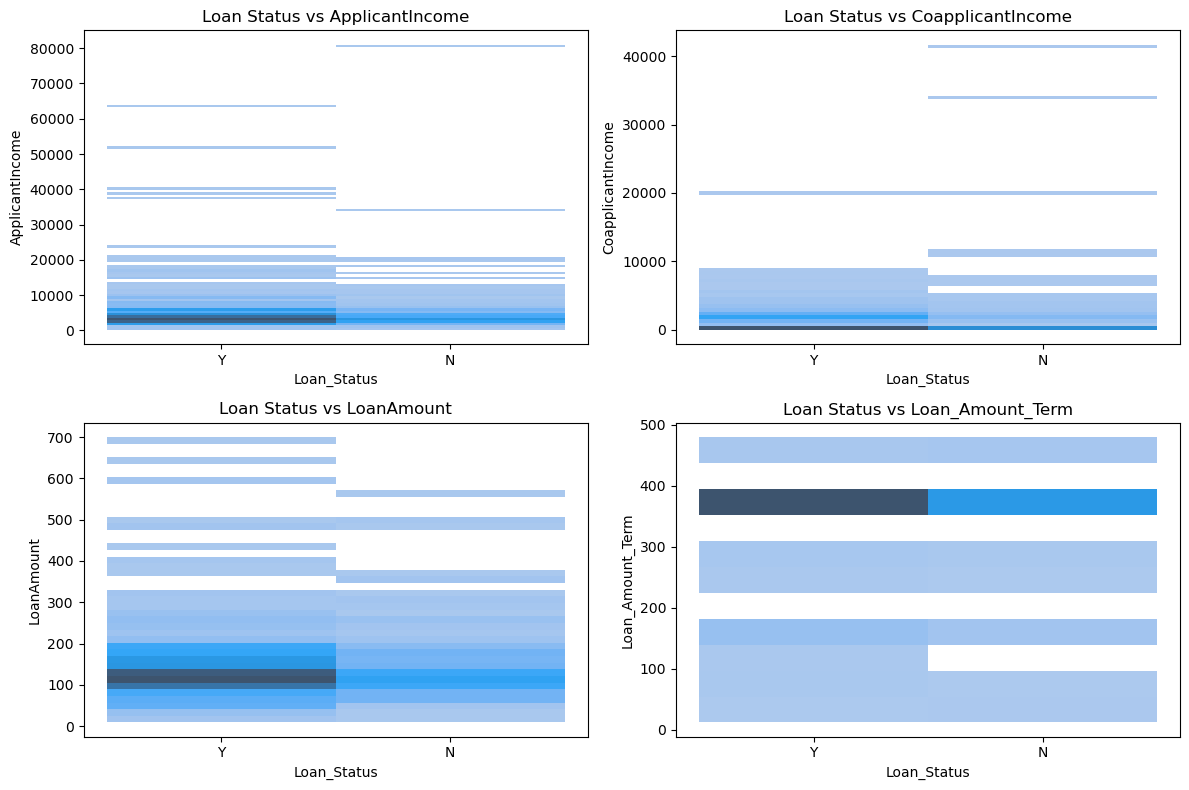

In [120]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(x='Loan_Status',y=col,data=df1)
    plt.title(f'Loan Status vs {col}')
plt.tight_layout()
plt.show()

### Loan Amount Term Analysis:

Loan Amount Term Analysis:
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


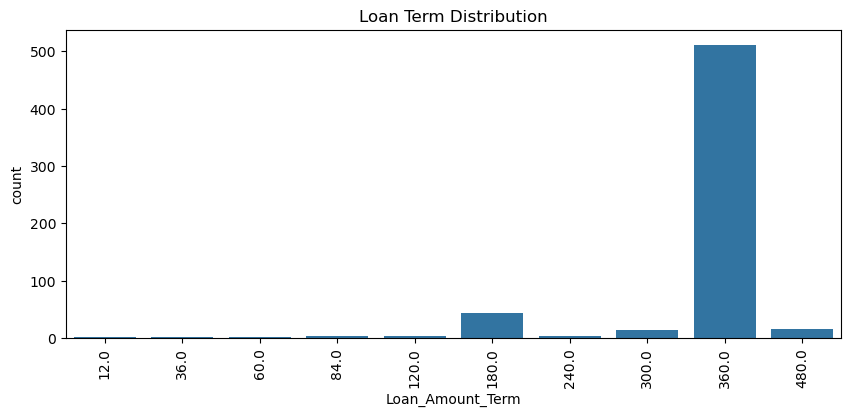

In [123]:
print("Loan Amount Term Analysis:")
print(df1['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x='Loan_Amount_Term',data=df1)
plt.title('Loan Term Distribution')
plt.xticks(rotation=90)
plt.show()

### Income Analysis:

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64


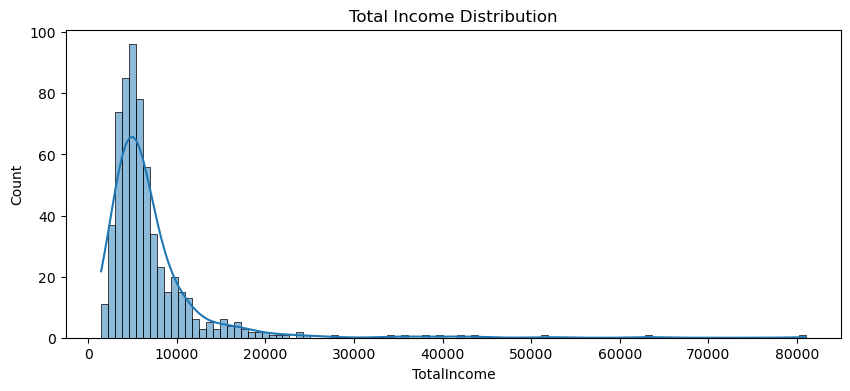

In [134]:
df1['TotalIncome']=df1['ApplicantIncome']+df1['CoapplicantIncome']
print(df1['TotalIncome'])
plt.figure(figsize=(10,4))
sns.histplot(df1['TotalIncome'],kde=True)
plt.title('Total Income Distribution')                     
plt.show()

In [ ]:
# 9. Outlier Detection
print("\n=== Outlier Detection ===")
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

###  Outlier Detection:

In [152]:
print("\n=== Outlier Detection ===")
for col in numerical_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")


=== Outlier Detection ===
ApplicantIncome: 50 outliers detected
CoapplicantIncome: 18 outliers detected
LoanAmount: 39 outliers detected
Loan_Amount_Term: 88 outliers detected
